In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import xgboost as xgb
from utils.evaluation import f1_macro

# Model Development 
Gradient Boosted Trees using the python Xgboost package

Rational:
1. The underlying decision tree structure of XGboost allows to utilize both categorical and continuous features
2. The model automatically handles missing values as 0 by default - learns splitting that optimizes score
3. Simple mathematical algorithm, ensembled together to produce high performance

In [3]:
# Specify directory
temp_data_dir = '../data/temp/'
os.listdir(temp_data_dir)

['X_dev.knn.normalized.csv',
 '.DS_Store',
 'X_dev.csv',
 'y_dev.csv',
 'X_train.knn.normalized.csv',
 'X_train.zeros.csv',
 'X_train.pca.knn.normalized.csv',
 'X_dev.zeros.csv',
 'X_dev.pca.knn.normalized.csv',
 'X_dev.normalized.csv',
 'X_train.csv',
 'X_train.normalized.csv',
 'y_train.csv']

## 1. Test Vanilla XGBoost classifier
- Categorical features converted into binary (0,1)
- Missing values in continous features

In [2]:
# Load data 
X_train = pd.read_csv(temp_data_dir + 'X_train.csv', index_col = 0)
y_train = pd.read_csv(temp_data_dir + 'y_train.csv', index_col = 0)
X_dev = pd.read_csv(temp_data_dir + 'X_dev.csv', index_col = 0)
y_dev = pd.read_csv(temp_data_dir + 'y_dev.csv', index_col = 0)

In [3]:
X_train.head()

,age,M,F,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,...,TSH,T3,TT4,T4U,FTI,STMW,SVHC,SVHD,SVI,other
1753,61.0,1,0,0,0,0,0,0,0,0,...,1.20,NaN,93.0,0.94,98.0,0,0,0,1,0
1754,38.0,1,0,0,0,0,0,0,0,0,...,0.10,1.5,106.0,0.79,134.0,0,0,0,1,0
1050,37.0,1,0,0,0,0,0,0,0,0,...,0.25,2.0,83.0,1.14,72.0,0,0,0,0,1
439,30.0,0,1,0,0,0,0,0,0,0,...,1.90,NaN,98.0,0.99,99.0,0,0,0,0,1
2538,72.0,0,1,0,0,0,0,0,0,0,...,1.40,1.4,115.0,0.97,118.0,0,1,0,0,0


In [5]:
X_dev.head()

,age,M,F,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,...,TSH,T3,TT4,T4U,FTI,STMW,SVHC,SVHD,SVI,other
2916,38.0,0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
1812,31.0,0,1,0,0,0,0,0,0,0,...,3.40,NaN,79.0,0.95,83.0,0,0,0,0,1
877,55.0,0,1,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
973,63.0,0,1,0,0,0,0,0,0,0,...,0.67,1.8,107.0,0.85,126.0,0,0,0,0,1
1060,29.0,1,0,0,0,0,0,0,0,0,...,1.40,3.8,127.0,1.14,112.0,0,1,0,0,0


In [4]:
# Structure data for Xgboost
y_dev = y_dev['Class'].values
y_train = y_train['Class'].values

In [7]:
# Train Classifier 
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=234)
xg_cl.fit(X_train, y_train)

# Make Predictions
predictions = xg_cl.predict(X_dev)

In [8]:
f1_macro(y_dev, predictions)

0.8311688311688312

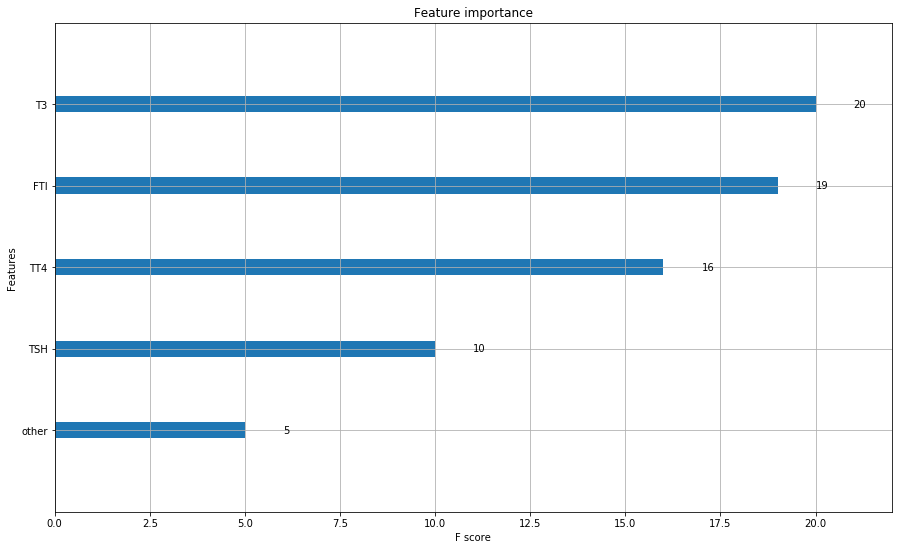

<Figure size 1080x648 with 0 Axes>

In [9]:
# Observe which features were most important to refine features for next iteration
plt.rcParams['figure.figsize'] = [15, 9]
xgb.plot_importance(xg_cl, max_num_features=15)
plt.figure(figsize=(15,9))
plt.show()

Results show that most of the column variables were not important for predictions. 

## 2. Test Vanilla XGBoost classifier on normalized features

In [6]:
temp_data_dir = '../data/temp/'

# Load data
X_train = pd.read_csv(temp_data_dir + 'X_train.normalized.csv', index_col = 0)
y_train = pd.read_csv(temp_data_dir + 'y_train.csv', index_col = 0)
X_dev = pd.read_csv(temp_data_dir + 'X_dev.normalized.csv', index_col = 0)
y_dev = pd.read_csv(temp_data_dir + 'y_dev.csv', index_col = 0)

In [11]:
features = ['FTI', 'T3', 'TT4', 'TSH']
# features = X_train.columns

In [43]:
X_train = X_train[features]
X_dev = X_dev[features]

# Structure data for Xgboost
y_dev = y_dev['Class'].values
y_train = y_train['Class'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [13]:
# Train Classifier 
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10)

xg_cl.fit(X_train, y_train)

# Make Predictions
predictions = xg_cl.predict(X_dev)

f1_macro(y_dev, predictions)

0.8378378378378378

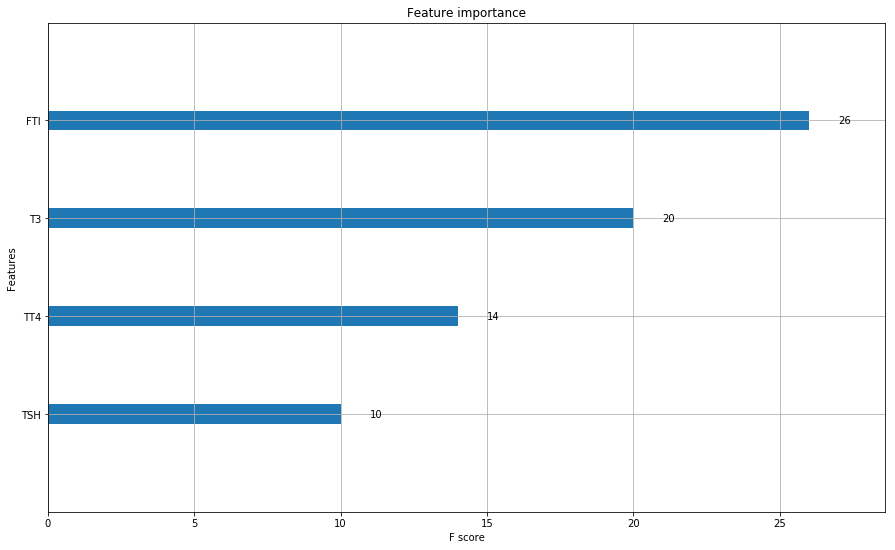

<Figure size 1080x648 with 0 Axes>

In [14]:
# Observe which features were most important to refine features for next iteration
xgb.plot_importance(xg_cl)
plt.rcParams['figure.figsize'] = [15, 9]
plt.figure(figsize=(15,9))
plt.show()

## 3. Test Vanilla XGBoost classifier on normalized + imputed data

In [15]:
temp_data_dir = '../data/temp/'

# Load data
X_train = pd.read_csv(temp_data_dir + 'X_train.knn.normalized.csv', index_col = 0)
y_train = pd.read_csv(temp_data_dir + 'y_train.csv', index_col = 0)
X_dev = pd.read_csv(temp_data_dir + 'X_dev.knn.normalized.csv', index_col = 0)
y_dev = pd.read_csv(temp_data_dir + 'y_dev.csv', index_col = 0)

In [16]:
features = ['FTI', 'T3', 'TT4', 'TSH']

In [17]:
X_train = X_train[features]
X_dev = X_dev[features]

# Structure data for Xgboost
y_dev = y_dev['Class'].values
y_train = y_train['Class'].values

In [18]:
# Train Classifier 
xg_cl = xgb.XGBClassifier(objective='binary:logistic', 
                          n_estimators=10)

xg_cl.fit(X_train, y_train)

# Make Predictions
predictions = xg_cl.predict(X_dev)

f1_macro(y_dev, predictions)

0.8051948051948052

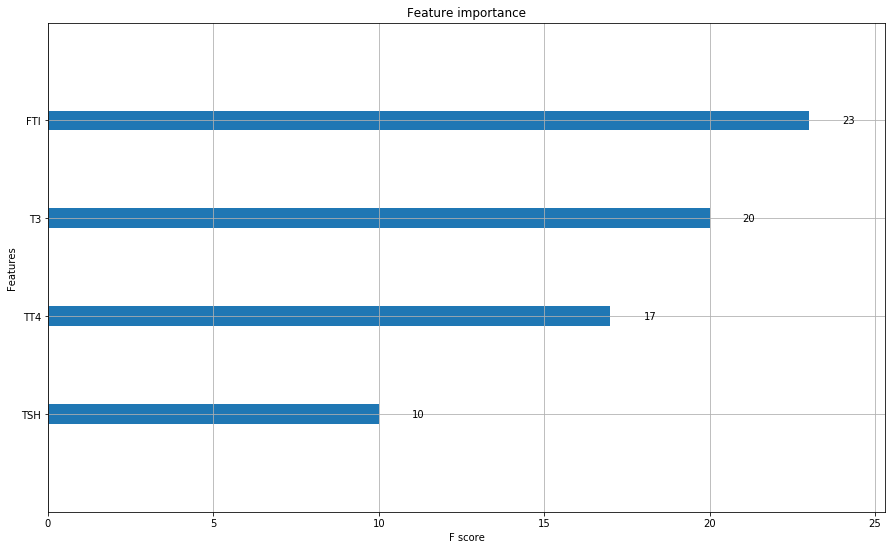

<Figure size 1080x648 with 0 Axes>

In [19]:
# Observe which features were most important to refine features for next iteration
xgb.plot_importance(xg_cl)
plt.rcParams['figure.figsize'] = [15, 9]
plt.figure(figsize=(15,9))
plt.show()

## 4. Test Vanilla XGBoost classifier on normalized + imputed data with PCA

In [37]:
temp_data_dir = '../data/temp/'

# Load data
X_train = pd.read_csv(temp_data_dir + 'X_train.pca.knn.normalized.csv', index_col = 0)
y_train = pd.read_csv(temp_data_dir + 'y_train.csv', index_col = 0)
X_dev = pd.read_csv(temp_data_dir + 'X_dev.pca.knn.normalized.csv', index_col = 0)
y_dev = pd.read_csv(temp_data_dir + 'y_dev.csv', index_col = 0)

In [38]:
X_train.columns

Index(['age', 'M', 'F', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'STMW', 'SVHC', 'SVHD', 'SVI', 'other', 'pc1', 'pc2', 'pc3',
       'pc4'],
      dtype='object')

In [39]:
features = ['FTI', 'T3', 'TT4', 'TSH', 'pc1']

In [40]:
X_train = X_train[features]
X_dev = X_dev[features]

# Structure data for Xgboost
y_dev = y_dev['Class'].values
y_train = y_train['Class'].values

In [41]:
# Train Classifier 
xg_cl = xgb.XGBClassifier(objective='binary:logistic', 
                          n_estimators=10)

xg_cl.fit(X_train, y_train)

# Make Predictions
predictions = xg_cl.predict(X_dev)

f1_macro(y_dev, predictions)

0.3404255319148936

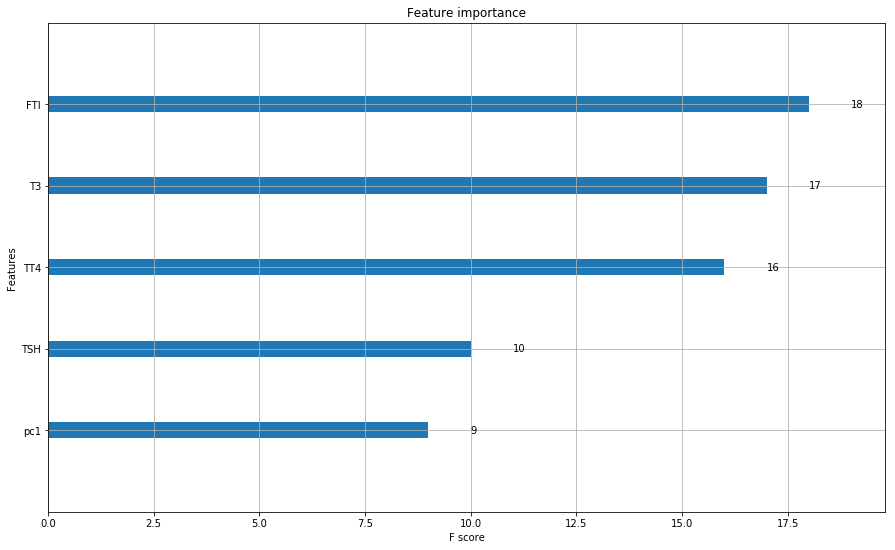

<Figure size 1080x648 with 0 Axes>

In [42]:
# Observe which features were most important to refine features for next iteration
xgb.plot_importance(xg_cl)
plt.rcParams['figure.figsize'] = [15, 9]
plt.figure(figsize=(15,9))
plt.show()

## 5. Model tuning with best performing data

In [69]:
# Reproducibility
seed = 352
np.random.seed(seed)

In [70]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [71]:
temp_data_dir = '../data/temp/'

# Load data
X_train = pd.read_csv(temp_data_dir + 'X_train.normalized.csv', index_col = 0)
y_train = pd.read_csv(temp_data_dir + 'y_train.csv', index_col = 0)
X_dev = pd.read_csv(temp_data_dir + 'X_dev.normalized.csv', index_col = 0)
y_dev = pd.read_csv(temp_data_dir + 'y_dev.csv', index_col = 0)

# Select best features
features = ['FTI', 'T3', 'TT4', 'TSH']

X_train = X_train[features]
X_dev = X_dev[features]

# Structure data for Xgboost
y_dev = y_dev['Class'].values
y_train = y_train['Class'].values

In [72]:
# Train Classifier 
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10)

In [73]:
params = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.02, 0.04, 0.08, 0.1],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0.5, 1, 1.5, 2, 5],
}

In [74]:
folds = 5
param_comb = 500

cv = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)

random_search = RandomizedSearchCV(xg_cl, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='roc_auc', 
                                   n_jobs=4, 
                                   cv=cv.split(X_train,y_train), 
                                   verbose=3, 
                                   random_state=seed)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 225 is smaller than n_iter=500. Running 225 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1125 out of 1125 | elapsed:    7.6s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x124690a20>,
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=500, n_jobs=4,
          param_distributions={'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.02, 0.04, 0.08, 0.1], 'colsample_bytree': [0.6, 0.8, 1.0], 'gamma': [0.5, 1, 1.5, 2, 5]},
          pre_dispatch='2*n_jobs', random_state=352, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [75]:
# print('\n All results:')
# print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.08,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

 Best normalized gini score for 5-fold search with 500 parameter combinations:
0.9752451239024265

 Best hyperparameters:
{'max_depth': 3, 'learning_rate': 0.08, 'gamma': 0.5, 'colsample_bytree': 0.6}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_scor

## Test parameters

In [76]:
temp_data_dir = '../data/temp/'

# Load data
X_train = pd.read_csv(temp_data_dir + 'X_train.normalized.csv', index_col = 0)
y_train = pd.read_csv(temp_data_dir + 'y_train.csv', index_col = 0)
X_dev = pd.read_csv(temp_data_dir + 'X_dev.normalized.csv', index_col = 0)
y_dev = pd.read_csv(temp_data_dir + 'y_dev.csv', index_col = 0)

In [77]:
features = ['FTI', 'T3', 'TT4', 'TSH']

In [78]:
X_train = X_train[features]
X_dev = X_dev[features]

# Structure data for Xgboost
y_dev = y_dev['Class'].values
y_train = y_train['Class'].values

In [79]:
# Train Classifier 
xg_cl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.08,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

xg_cl.fit(X_train, y_train)

# Make Predictions
predictions = xg_cl.predict(X_dev)

f1_macro(y_dev, predictions)

0.5901639344262296